In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

MCMC Assignment 1

In [2]:
mu = 1
sigma = 1
norm = np.random.normal(loc=1, scale=1, size=10000)

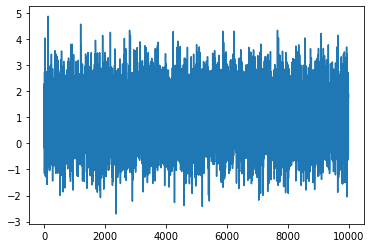

In [3]:
plt.plot(norm)
plt.show()

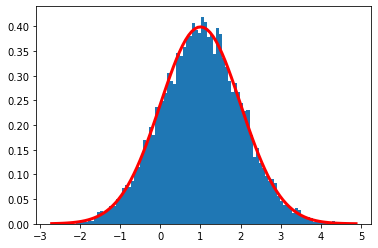

In [4]:
count, bins, ignored = plt.hist(norm,bins=100,density=True)
plt.plot(bins,1/(sigma*np.sqrt(2*np.pi))*np.exp(-(bins-mu)**2/(2*sigma**2) ),linewidth=3,color='r')
plt.show()

Algorithm 1 MCMC
1: i = 0
2: Choose random starting point for x[0], compute p(x[0])
3: while i < N do
4:     Draw random guess y
5:     Calculate Hasting’s ratio H = p(y)/p(x[i])
6:     Draw α from U[0, 1]
7:     if H ≥ α then
8:         x[i + 1] = y
9:     else
10:        x[i + 1] = x[i]
11:    end if
12:    i = i + 1
13: end while

In [84]:
def pOf(x,sigma=1,mu=1):
    return (1.0/(sigma*np.sqrt(2.0*np.pi))) * (np.e**(-((x-mu)**2)/(2.0*sigma**2))) 
    
def gaussianChain(mu=1,sigma=1,N=10000):
    x = []
    x.append(np.random.random())
    accepted = 0
    
    for i in range(0,N):
        y = x[i] + np.random.normal(loc=0,scale=sigma)
        h = pOf(y)/pOf(x[i])
        alpha = np.random.random()
        if h>= alpha:
            x.append(y)
            accepted+=1
        else:
            x.append(x[i])
    
    acceptedPercent = accepted/N
    
    return x, acceptedPercent
    

In [65]:
def showPlots(jump_sigma=1,hist_bins=100,compare_sigma=1,compare_mu=1):
    chain, acceptance = gaussianChain(sigma=jump_sigma)
    print("Accepted: "+ str(acceptance*100)+"%")
    plt.plot(chain)
    plt.show()
    count, bins, ignored = plt.hist(chain,bins=hist_bins,density=True)
    plt.plot(bins,1/(compare_sigma*np.sqrt(2*np.pi))*np.exp(-(bins-compare_mu)**2/(2*compare_sigma**2) ),linewidth=3,color='r')
    plt.show()


Accepted: 99.89%


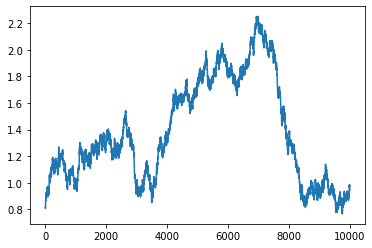

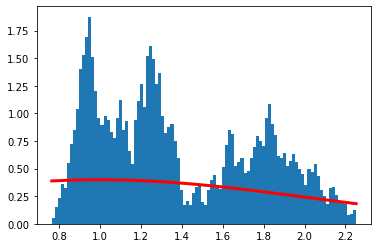

In [85]:
showPlots(.01)

Accepted: 96.89999999999999%


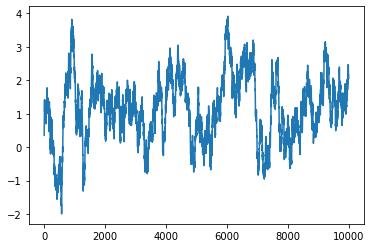

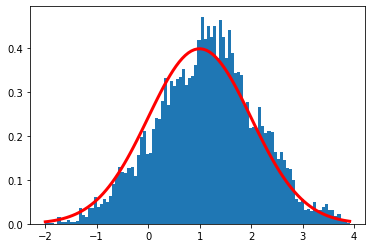

In [87]:
showPlots(.1)

Accepted: 70.53%


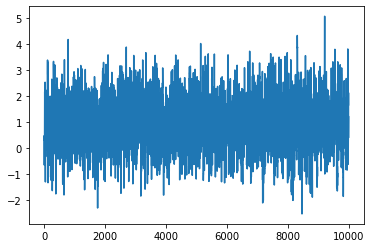

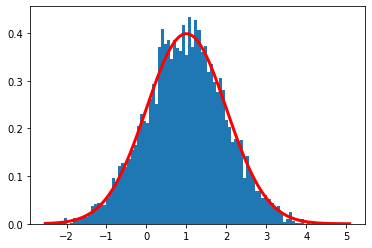

In [88]:
showPlots(1)

Accepted: 12.16%


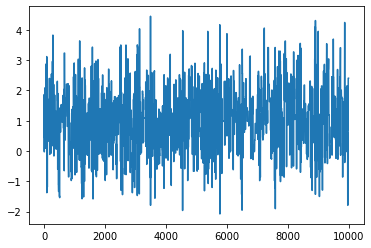

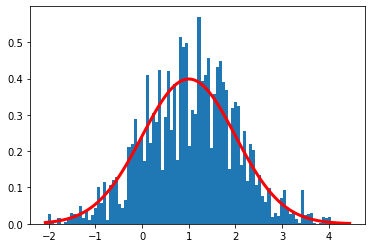

In [89]:
showPlots(10)

Accepted: 1.16%


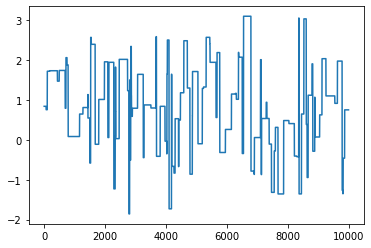

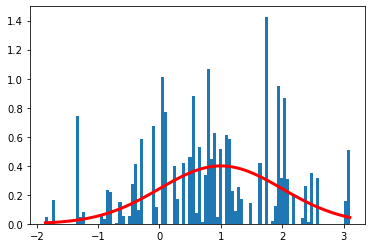

In [90]:
showPlots(100)

MCMC Assignment 2

In [107]:
def likelyhood(x,mu,sigma):
    ret = 1
    for i in range(0,len(x)):
        factor = 1/(sigma*np.sqrt(2*np.pi))
        exponent = -(((x[i]-mu)**2) / (2*(sigma**2)))
        curVal = factor * np.exp(exponent)
        if (ret*curVal==0):
            print("Value to small, \nvalue before: {},"+
                  "\nValue to Multipy: {},"+
                  " \nValue After: {}".format(ret,
                                              curVal,
                                              ret*curVal)
                 )
            break
        ret = ret * curVal
        
    return ret


In [108]:
def logLikelyhood(x,mu,sigma):
    ret = 0
    for i in range(0,len(x)):
        exponent = -(((x[i]-mu)**2) / (2*(sigma**2)))
        ret += exponent
        
    return ret

In [109]:
temp = gaussianChain(sigma=1,N=10000)
chain = temp[0]
acceptanceRate = temp[1]

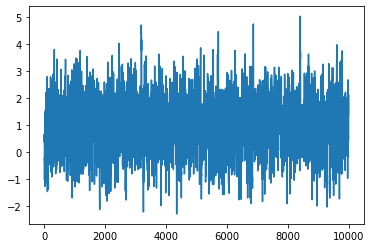

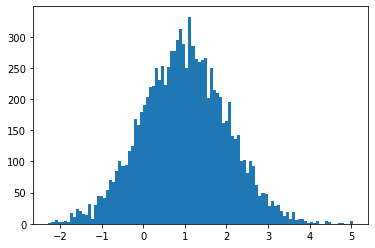

In [110]:
plt.plot(chain)
plt.show()
plt.hist(chain,bins=100)
plt.show()

In [92]:
def findBestGuessGaussian(chain,mu=1,sigma=1,N=1000):
    guesses = []
    bestGuess = None
    for i in range(0,N):
        Nmu = np.random.normal(loc=mu, scale=sigma)
        Nsigma = np.random.normal(loc=mu, scale=sigma)
        likelyhood = pLikelyLog(chain,Nmu,Nsigma)
        guesses.append((mu,sigma,likelyhood))
        if(bestGuess==None or likelyhood > bestGuess[2]):
            bestGuess = (Nmu,Nsigma,likelyhood)
    
    return guesses, bestGuess
    

In [106]:
guesses, best = findBestGuessGaussian(chain,1,1,100)
print("Tested {} different pairs".format(len(guesses)))
print("Best guess: \nMu:{}\nSigma:{}\nLnLikelyhood:{}".format(best[0],best[1],best[2]))

Tested 100 different pairs
Best guess: 
Mu:1.3519633258134864
Sigma:3.350079155757438
LnLikelyhood:-504.5625343584646


In [62]:
print(guesses[0][2])

-2850.6640410222108
